<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications/blob/main/CSD458_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submission deadline: Friday 1/3/2024 on elearn

---
## **Homework: Part 1**


- ### There is a generalized family of distributions called Gaussian Mixture Models GMMs (simply a sum of Gaussians), with a $pdf$ given by:

\begin{equation}
p(x) = \sum_{i=1}^{K} w_i \mathbb{N}(x|\mu_i, \sigma_i)
\end{equation}

Where:
1. $K$: is the number of Gaussians
2. $\mu_i, \sigma_i$: are the parameters of each Gaussian
3. $w_i$: is the coefficient (weight) of each Gaussian (mode)
<br>

- ### In order for the GMM to be a distribution the coefficents $w_i$, must sum to one:

\begin{equation}
\sum_{i=1}^{K}w_i = 1
\end{equation}

![Subdirectory Image](https://github.com/gtsagkatakis/Data-Science-and-Applications/blob/ee5a8decd5ca7b22312e1a34868526ea6c76b392/Images/gmm.png?raw=true')


<br><br>

## You are given a GMM model consisting of 3 Gaussians: $\mathbb{N}_1(0, 1), \mathbb{N}_2(-2, 0.5), \mathbb{N}_3(3, 2),$

1. #### Compute the $pdf$ of the GMM analytically using the libraries desribed above and plot the actual $pdfs$.
2. #### Assuming we are given the GMM model, sample from our model using the method we described above in a two-step way.
    First flip a $K$ sided coin to decide from which mode (Gaussian) we are sampling from

    Then, use the exact same trick we had above to samples from the specific Gaussian

    Plot the actual GMMs and the histogram of your samples for different sample sizes (e.g. $100, 1000, 10000$)

    Show that the histogram converges to the actual distribution

    **Hint:** You can use the numpy.random.choice() function and pass in the list of $w_i$ coefficients as the list of probabilities of each mode (Gaussian)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

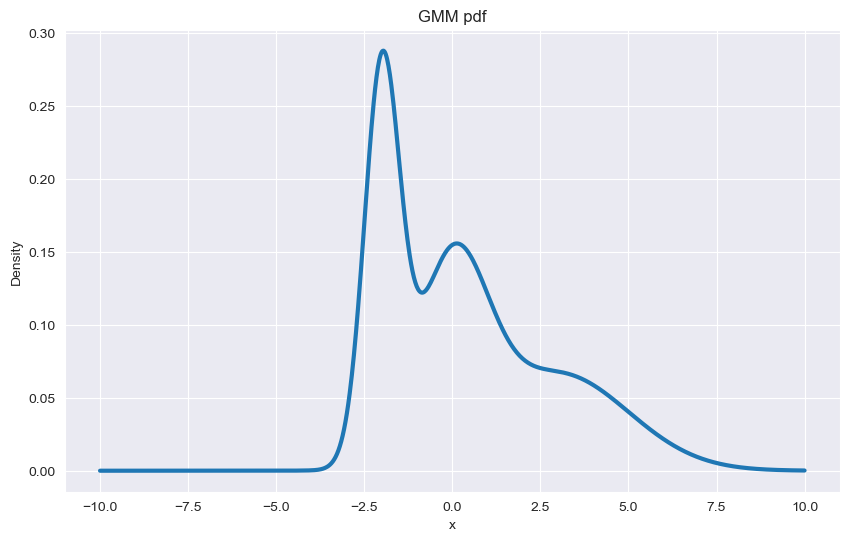

In [3]:
# Analytically generate the GMM model pdf

# function to calculate a single normal pdf
def normal_pdf(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)


# Parameters of the GMM
mu = [0, -2, 3]
sigma = [1, 0.5, 2]
w = [1/3, 1/3, 1/3]

# Generate points on the x axis
x = np.linspace(-10, 10, 1000)

# Calculate the GMM function
y = w[0] * normal_pdf(x, mu[0], sigma[0]) + w[1] * normal_pdf(x, mu[1], sigma[1]) + w[2] * normal_pdf(x, mu[2], sigma[2])

# Plot the GMM function
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

axs.plot(x, y, linewidth=3)
axs.set_title('GMM pdf')
axs.set_xlabel('x')
axs.set_ylabel('Density')

plt.show()

In [4]:
# Sample from the GMM and store the samples in np.vectors

# sample sizes
n_samples = [100, 1000, 10000]

# array that holds the results
samples = []

# loop through the sample sizes
for n in n_samples:
    # array that holds the samples for the current sample size
    s = []
    for i in range(n):
        # flip a K sided coin to decide from which mode (Gaussian) we are sampling from
        mode = np.random.choice([0, 1, 2], p=w)
        # use the exact same trick we had above to samples from the specific Gaussian
        s.append(np.random.normal(mu[mode], sigma[mode]))
    samples.append(s)


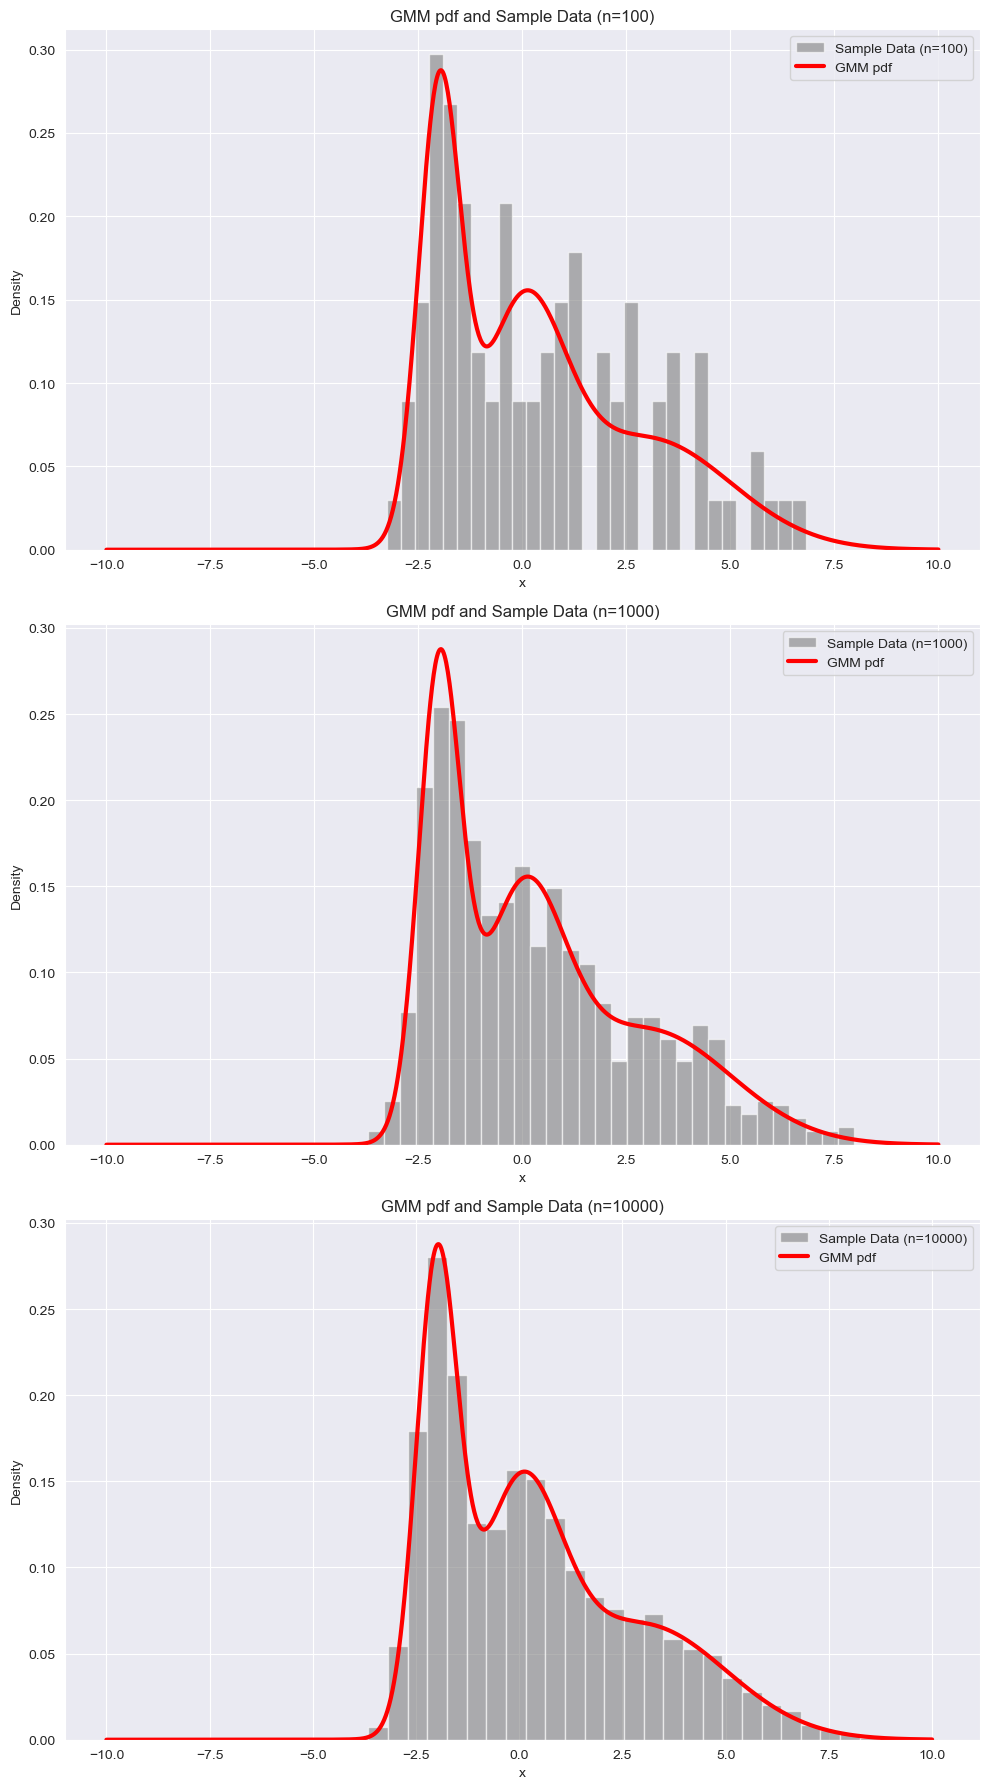

In [5]:
# Generate various plots for differnt sample sizes and show the convergence to the actual pdf

# create a 3 plot figure
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# loop through the sample sizes
for i in range(len(n_samples)):
    # plot the histogram of the samples for the current sample size
    axs[i].hist(samples[i], bins=30, density=True, alpha=0.6, color='gray', label=f'Sample Data (n={n_samples[i]})')
    # plot the actual GMM pdf
    axs[i].plot(x, y, linewidth=3, color='r', label='GMM pdf')
    axs[i].set_title(f'GMM pdf and Sample Data (n={n_samples[i]})')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('Density')
    axs[i].legend()

plt.tight_layout()
plt.show()


---
## **Homework: Part 2**

- #### Use the sklearn Breast Cancer Dataset we used and pick a different feature to analyze that you think is likely to be generated from an underlying Gaussian.

- #### That means you will be assuming that the distribution of the feature you choose is coming from a Gaussian parametrized by the vector:

\begin{equation}
\vec{\theta} = [\mu, \sigma]
\end{equation}

- #### Plot the Histogram of you feature, and the 0.05, 0.25, 0.5, 0.75, 0.95 p-values

- #### Calculate the mean and the std esimates of your feature vector

- #### Use the Maximum Likelihood Estimation we saw before to estimate the parameter vector and thus the Gaussian that best describes the feature vector you selected.

- #### One can easily estimate the Gaussian without the Maximum Likelihood Estimation by simply using the mean and std estimates we saw earlier. Use this simple derivation to compare against the MLE solution. These two should be the same

#### **Hints:** In this case you will have a function of both $\mu$ and $\sigma$. Get the partial derivatives of each one and set them to zero.


In [7]:

# Import modules/libraries
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt


# Get data
data = load_breast_cancer(as_frame=True).data

# Printing head and tail of data frame to get some first view
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


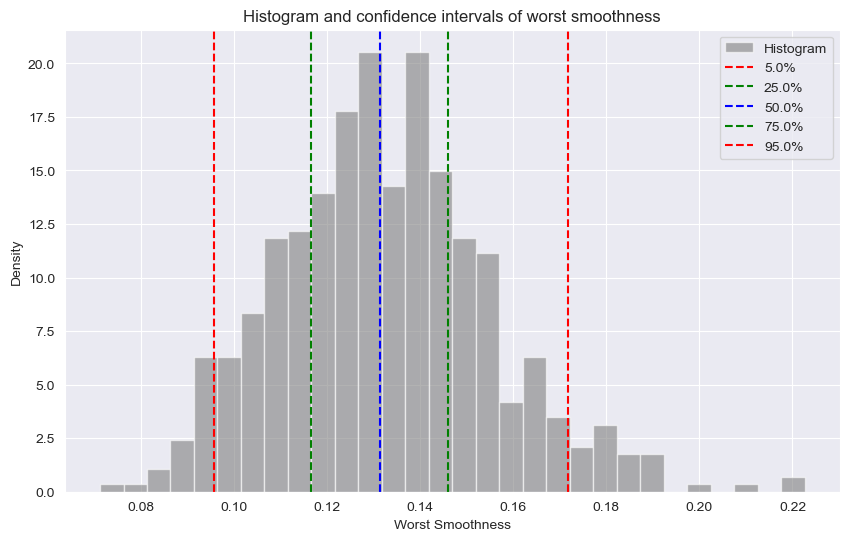

In [8]:
# Select a feature vector, plot its histogram and p-values with vertical axes
worst_smoothness = data['worst smoothness']

# Plot the histogram of the feature
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.hist(worst_smoothness, bins=30, density=True, alpha=0.6, color='gray', label='Histogram')

# Plot the confidence intervals
colors = ['r', 'g', 'b', 'g', 'r']
interval = [0.05, 0.25, 0.5, 0.75, 0.95]

for i in range(len(interval)):
    axs.axvline(np.percentile(worst_smoothness, interval[i] * 100), color=colors[i], linestyle='--', label=f'{interval[i] * 100}%')

axs.set_title('Histogram and confidence intervals of worst smoothness')
axs.set_xlabel('Worst Smoothness')
axs.set_ylabel('Density')

plt.legend()
plt.show()

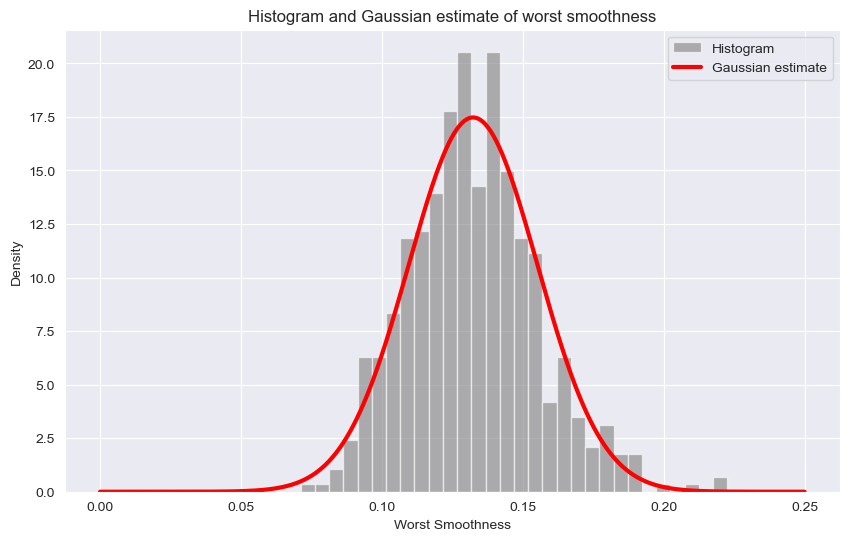

In [9]:
# Derive the Gaussian estimate by simply using the mean and std estimates and plot them against the histogram

mean = worst_smoothness.mean()
std = worst_smoothness.std()

# Generate points on the x axis
x = np.linspace(0, 0.25, 1000)
y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

# Plot the histogram of the feature

fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.hist(worst_smoothness, bins=30, density=True, alpha=0.6, color='gray', label='Histogram')

# Plot the Gaussian estimate
axs.plot(x, y, linewidth=3, color='r', label='Gaussian estimate')
axs.set_title('Histogram and Gaussian estimate of worst smoothness')
axs.set_xlabel('Worst Smoothness')
axs.set_ylabel('Density')

plt.legend()
plt.show()

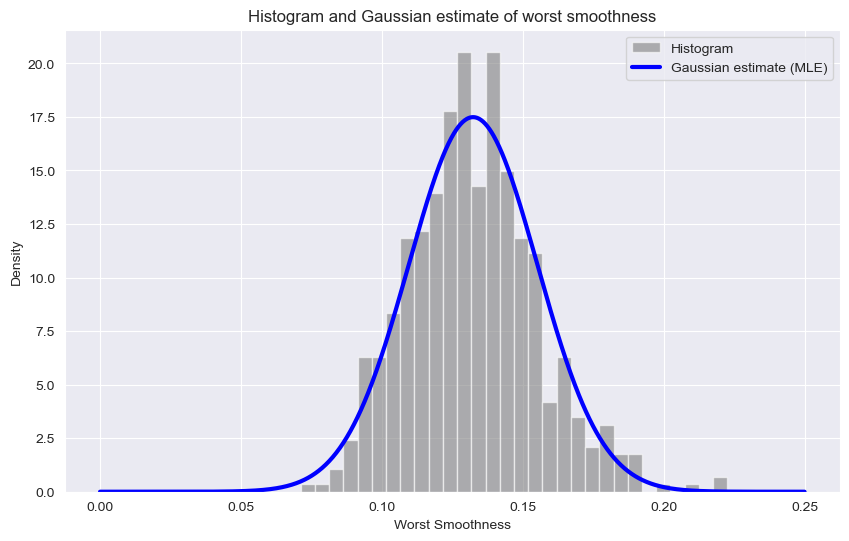

In [10]:
# Use the Maximum Likelihood Estimation (MLE) method to estimate the mean and std. Plot the new estimated Gaussian against the previous and the histogram (They should be the same)

# MLE estimate of the mean
mean_mle = np.sum(worst_smoothness) / len(worst_smoothness)
std_mle = np.sqrt(np.sum((worst_smoothness - mean_mle) ** 2) / len(worst_smoothness))

# Generate points on the x axis
x = np.linspace(0, 0.25, 1000)
y_mle = (1 / (np.sqrt(2 * np.pi) * std_mle)) * np.exp(-0.5 * ((x - mean_mle) / std_mle) ** 2)

# Plot the histogram of the feature
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

axs.hist(worst_smoothness, bins=30, density=True, alpha=0.6, color='gray', label='Histogram')

# Plot the Gaussian estimate
axs.plot(x, y_mle, linewidth=3, color='b', label='Gaussian estimate (MLE)')

axs.set_title('Histogram and Gaussian estimate of worst smoothness')
axs.set_xlabel('Worst Smoothness')
axs.set_ylabel('Density')

plt.legend()
plt.show()